# **Diabetes Risk Analysis - Hypothesis Testing**

## Objectives

- Test hypotheses related to diabetes risk factors.
- Analyze the relationship between diabetes risk and various health metrics.

**<u>Lists of hypotheses to be tested:</u>**

***H1. Blood Pressure Category vs Diabetes Risk***

- H₀: There is no association between `bp_category` and `diab_risk_cat`.
- H₁: There is an association between `bp_category` and `diab_risk_cat`.

***H2. BMI Category vs Diabetes Risk***

- H₀ (Null): There is no association between `bmi_category` and `diab_risk_cat`.
- H₁ (Alt): There is an association between `bmi_category` and `diab_risk_cat`.

***H3. Age Group vs Diabetes Risk***

- H₀: There is no association between `age_group` and `diab_risk_cat`.
- H₁: There is an association between `age_group` and `diab_risk_cat`.

***H4. Physical Activity vs Diabetes Risk***

- H₀: There is no association between `active` (physical activity) and `diab_risk_cat`.
- H₁: There is an association between `active` and `diab_risk_cat`.

***H5. Gender vs Diabetes Risk***

- H₀: There is no association between `gender` and `diab_risk_cat`.
- H₁: There is an association between `gender` and `diab_risk_cat`.

***H6. Weight vs Diabetes Risk***

- H₀: There is no relationship between `weight` and `diab_risk_cat`.
- H₁: There is a relationship between `weight` and `diab_risk_cat`.


## Inputs

- Dataset: `cardio_data_with_diabetes_risk_clean.csv`

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk'

---

## Load necessary libraries

In [26]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Load cleaned dataset for AB testing

In [31]:
path = 'dataset/cleaned/cardio_data_with_diabetes_risk_clean.csv'
df = pd.read_csv(path)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,...,age_group,bmi_category,age_simp_group,bmi_simp_cat,diab_risk_percent,diab_risk_cat,age_group_num,bmi_category_num,bp_category_num,diab_risk_cat_num
0,2,168,4.127134,110,80,1,1,0,0,1,...,50-59,Normal,Middle-aged,Low BMI,16.15,Low Risk,3,1,2,0
1,1,156,4.442651,140,90,3,1,0,0,1,...,50-59,Obese I,Middle-aged,Mid BMI,57.50,High Risk,3,3,3,2
2,1,165,4.158883,130,70,3,1,0,0,0,...,50-59,Normal,Middle-aged,Low BMI,18.21,Low Risk,3,1,2,0
3,2,169,4.406719,150,100,1,1,0,0,1,...,40-49,Overweight,Middle-aged,Mid BMI,19.62,Low Risk,2,2,3,0
4,1,156,4.025352,100,60,1,1,0,0,0,...,40-49,Normal,Middle-aged,Low BMI,9.76,Low Risk,2,1,0,0


---

## Hypothesis 1: Blood Pressure Category vs Diabetes Risk Category
- **Null Hypothesis (H<sub>0</sub>)**: There is no relationship between `bp_category` and `diab_risk_cat`.
- **Alternative Hypothesis (H<sub>1</sub>)**: There is a relationship between `bp_category` and `diab_risk_cat`.


In [7]:
# Both 'bp_category' and 'diab_risk_cat' are categorical variables.
# Hence, I will use the Chi-Squared test of independence to check if there is a significant association between them.

expected, observed, stats = pg.chi2_independence(data=df, x='bp_category', y='diab_risk_cat')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,3353.432449,6.0,0.0,0.156791,1.0
1,cressie-read,0.666667,3350.677013,6.0,0.0,0.156727,1.0
2,log-likelihood,0.000000,3388.078622,6.0,0.0,0.157599,1.0
3,freeman-tukey,-0.500000,3456.134557,6.0,0.0,0.159174,1.0
4,mod-log-likelihood,-1.000000,3562.078752,6.0,0.0,0.161595,1.0
5,neyman,-2.000000,3908.108400,6.0,0.0,0.169262,1.0


In [11]:
print(f"P-Value for Blood Pressure Category vs Diabetes Risk Category: {stats.query('test == "pearson"')['pval']}")

P-Value for Blood Pressure Category vs Diabetes Risk Category: 0    0.0
Name: pval, dtype: float64


**p-value = 0.0**

- This means the probability of observing the given data if the null hypothesis were true is virtually zero.
- There is strong evidence to reject the null hypothesis (H₀), as there is a statistically significant association between Blood Pressure Category and Diabetes Risk.

**Cramér’s V = ~0.157**

- Cramér's V measures effect size (strength of association).
- Interpretation:

    - 0.1 → Small effect
    - 0.3 → Medium
    - 0.5 → Large

- Result: A *small to moderate* association exists between Blood Pressure Category and Diabetes Risk.

**Power = 1.0**

- Statistical power = 100%, meaning the test is very likely to detect an effect if one exists.
- This confirms the test's reliability and sufficient sample size.

**Summary**
- There is a statistically significant and reliable association between Blood Pressure Category and Diabetes Risk.
- The strength of the association is small to moderate, but given the high significance, it's likely clinically relevant, especially in large populations.

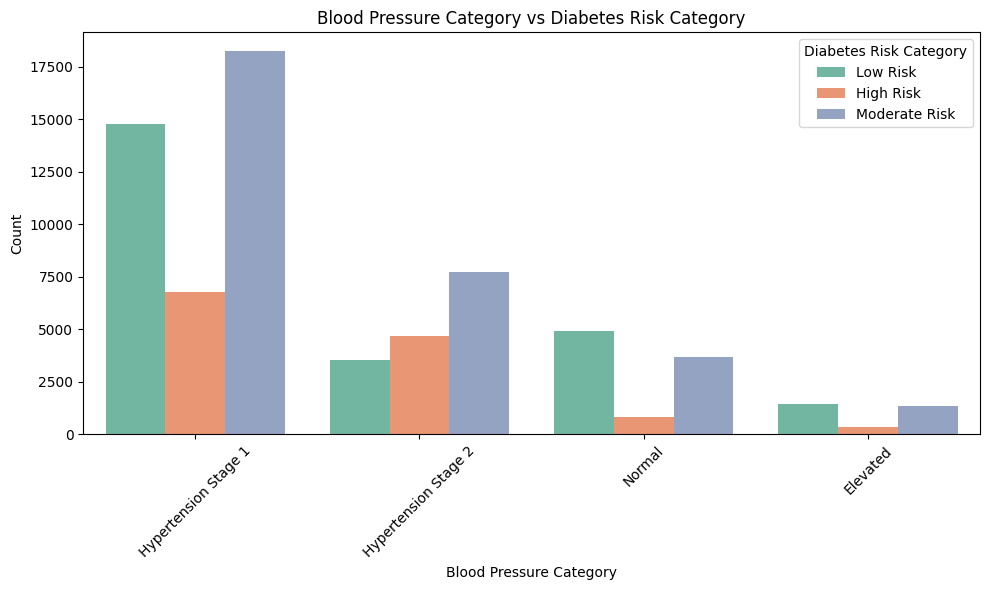

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bp_category', hue='diab_risk_cat', palette='Set2')
plt.title('Blood Pressure Category vs Diabetes Risk Category')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.legend(title='Diabetes Risk Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Hypothesis 2: BMI Category vs Diabetes Risk Category

- **Null Hypothesis (H<sub>0</sub>)**: There is no relationship between BMI Category and Diabetes Risk Category.
- **Alternative Hypothesis (H<sub>1</sub>)**: There is a relationship between BMI Category and Diabetes Risk Category.

***Note***
- I have selected `bmi_simp_cat` feature as the BMI category for this analysis, which is a simplified version of the `bmi_category`.
- I am going to use `pd.crosstab` for this hypothesis to get a quick view on frequency table of the two categorical variables. Chi2_independence may not perform well if the expected frequencies are too low.

**Crosstab**

It is a function in pandas that creates a cross-tabulation of two (or more) factors. It computes a simple cross-tabulation of two (or more) factors, which is useful for summarizing the relationship between categorical variables.

**<u>Importance of Crosstab:</u>**

**Exploratory Data Analysis (EDA):**
    - Helps quickly understand relationships between categorical features.

**Frequency Tables:**
    - Useful for generating count tables needed in statistics or data reporting.

**Input for Statistical Tests:**
    - Often used for Chi-squared tests of independence.

In [23]:
pd.crosstab(df['bmi_simp_cat'], df['diab_risk_cat'])

diab_risk_cat,High Risk,Low Risk,Moderate Risk
bmi_simp_cat,,,
High BMI,5232,0,725
Low BMI,0,22609,3196
Mid BMI,7362,2023,27058


In [24]:
expected, observed, stats = pg.chi2_independence(data=df, x='bmi_simp_cat', y='diab_risk_cat')
stats

/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk/.venv/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk/.venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk/.venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk/.venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,6.519312e+04,4.0,0.0,0.691318,1.0
1,cressie-read,0.666667,6.300571e+04,4.0,0.0,0.679621,1.0
2,log-likelihood,0.000000,6.651897e+04,4.0,0.0,0.698312,1.0
3,freeman-tukey,-0.500000,NaN,4.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,4.0,0.0,inf,NaN
5,neyman,-2.000000,NaN,4.0,NaN,NaN,NaN


In [25]:
print(f"P-Value for BMI Category vs Diabetes Risk Category: {stats.query('test == "pearson"')['pval']}")

P-Value for BMI Category vs Diabetes Risk Category: 0    0.0
Name: pval, dtype: float64


**p-value = 0.0**

- This means the probability of observing the given data if the null hypothesis were true is virtually zero.
- There is strong evidence to reject the null hypothesis (H₀), as there is a statistically significant association between BMI Category and Diabetes Risk.

**Cramér’s V = ~0.691**

- This is considered a strong association (Cramer's V ranges from 0 to 1, where values above 0.5 are strong).
- The association is not just statistically significant but also practically meaningful.

**Power = 1.0**

- Statistical power = 100%, meaning the test is very likely to detect an effect if one exists.
- This confirms the test's reliability and sufficient sample size.

**Summary**
- There is a strong and statistically significant association between BMI Category and Diabetes Risk. People in different BMI categories tend to have different levels of diabetes risk, supporting the hypothesis that BMI is a relevant factor in diabetes risk assessment.

In [27]:
fig = px.histogram(df, x='bmi_simp_cat', color='diab_risk_cat', 
                   barmode='group', text_auto= 'o.2s',
                   title='Diabetes Risk by BMI Category')
fig.show()

---

## Hypothesis 3: Age Group vs Diabetes Risk Category
- **Null Hypothesis (H<sub>0</sub>)**: There is no relationship between Age Group and Diabetes Risk Category.
- **Alternative Hypothesis (H<sub>1</sub>)**: There is a relationship between Age Group and Diabetes Risk Category.

***Note:***
- I have selected `age_simp_group` feature as the age group for this analysis, which is a simplified version of the `age_group`.
- I am going to use `pd.crosstab` for this hypothesis to get a quick view on frequency table of the two categorical variables.

In [28]:
pd.crosstab(df['age_simp_group'], df['diab_risk_cat'])

diab_risk_cat,High Risk,Low Risk,Moderate Risk
age_simp_group,,,
Adult,0,1440,313
Middle-aged,8835,22165,22769
Senior,3759,1027,7897


In [29]:
expected, observed, stats = pg.chi2_independence(data=df, x='age_simp_group', y='diab_risk_cat')
stats

/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk/.venv/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.

/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk/.venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning:

divide by zero encountered in power

/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk/.venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning:

invalid value encountered in multiply

/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk/.venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7991: RuntimeWarning:

divide by zero encountered in divide



,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,6672.609073,4.0,0.0,0.221169,1.0
1,cressie-read,0.666667,6917.062255,4.0,0.0,0.225184,1.0
2,log-likelihood,0.000000,7861.484835,4.0,0.0,0.240065,1.0
3,freeman-tukey,-0.500000,NaN,4.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,4.0,0.0,inf,NaN
5,neyman,-2.000000,NaN,4.0,NaN,NaN,NaN


**p-value = 0.0**

- This means the probability of observing the given data if the null hypothesis were true is virtually zero.
- There is strong evidence to **reject the null hypothesis (H₀)**, as there is a statistically significant association between Age Group and Diabetes Risk.

**Cramér’s V = ~0.221**

- This is considered a small to moderate association.
- This means while the association is statistically significant, it's not extremely strong—age group does influence Diabetes Risk, but it's one of several factors

**Power = 1.0**

- Statistical power = 100%, meaning the test is very likely to detect an effect if one exists.
- This confirms the test's reliability and sufficient sample size.

**Summary**
- There is a statistically significant association between Age Group and Diabetes Risk, with a small to moderate effect size. Age is an important factor influencing diabetes risk.